<a href="https://colab.research.google.com/github/OpiisiAnalyst/Portfolio-Data-Analyst/blob/main/Final%20Project%20SQL%20Myskill/Salinan_dari_Mentoring_Python_DA13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [ ]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [ ]:
#Mengampilkan 5 baris pertama
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [ ]:
#Mengampilkan 5 baris pertama
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [ ]:
#Mengampilkan 5 baris pertama
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [ ]:
#Mengampilkan 5 baris pertama
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [ ]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [ ]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [ ]:
#Mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [ ]:
#Menampikan tipe data tiap kolom
df.dtypes

id                  object
customer_id         object
order_date          object
sku_id              object
price                int64
qty_ordered          int64
before_discount    float64
discount_amount    float64
after_discount     float64
is_gross             int64
is_valid             int64
is_net               int64
payment_id           int64
payment_method      object
sku_name            object
base_price         float64
cogs                 int64
category            object
registered_date     object
dtype: object

In [ ]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int',\
              "after_discount":'int',"base_price":'int'})
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes

id                         object
customer_id                object
order_date         datetime64[ns]
sku_id                     object
price                       int64
qty_ordered                 int64
before_discount             int64
discount_amount             int64
after_discount              int64
is_gross                    int64
is_valid                    int64
is_net                      int64
payment_id                  int64
payment_method             object
sku_name                   object
base_price                  int64
cogs                        int64
category                   object
registered_date    datetime64[ns]
dtype: object

In [ ]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


id                         object
customer_id                object
order_date         datetime64[ns]
sku_id                     object
price                       int64
qty_ordered                 int64
before_discount             int64
discount_amount             int64
after_discount              int64
is_gross                    int64
is_valid                    int64
is_net                      int64
payment_id                  int64
payment_method             object
sku_name                   object
base_price                  int64
cogs                        int64
category                   object
registered_date    datetime64[ns]
dtype: object

In [ ]:
# Menambah kan kolom baru
df['month']=df['order_date'].dt.month_name()
df['year']=df['order_date'].dt.year

df.head()
df.dtypes

id                         object
customer_id                object
order_date         datetime64[ns]
sku_id                     object
price                       int64
qty_ordered                 int64
before_discount             int64
discount_amount             int64
after_discount              int64
is_gross                    int64
is_valid                    int64
is_net                      int64
payment_id                  int64
payment_method             object
sku_name                   object
base_price                  int64
cogs                        int64
category                   object
registered_date    datetime64[ns]
month                      object
year                        int64
dtype: object

## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode

# Memfilter Is_valid = 1
condition_1 = df['is_valid']==1
# Memfilter Category = Mobiles & Tables
condition_2 = df['category']=='Mobiles & Tablets'
# Memfilter tahun = 2022
condition_3 = df['year']==2022

        # Memamnggil seluruh Variable filter condition
df_no1 = df[(condition_1) & (condition_2) & (condition_3)].groupby(by=["sku_name"])["qty_ordered"].\
        sum().\
        reset_index(name='total_qty_2022').\
        sort_values(by = 'total_qty_2022', ascending=False).head(5)
# Menggunakan fungsi head untuk menampilakan Top 5 Produk
df_no1




,sku_name,total_qty_2022
1,IDROID_BALRX7-Gold,1000
2,IDROID_BALRX7-Jet black,31
3,Infinix Hot 4-Gold,15
43,samsung_Grand Prime Plus-Black,11
34,infinix_Zero 4-Grey,10


<ipython-input-29-f2eb4fd404c3>:3: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  df_no1.plot(x='sku_name',


<Axes: title={'center': 'TOP 5 Product'}, xlabel='Quantity', ylabel='Product Name'>

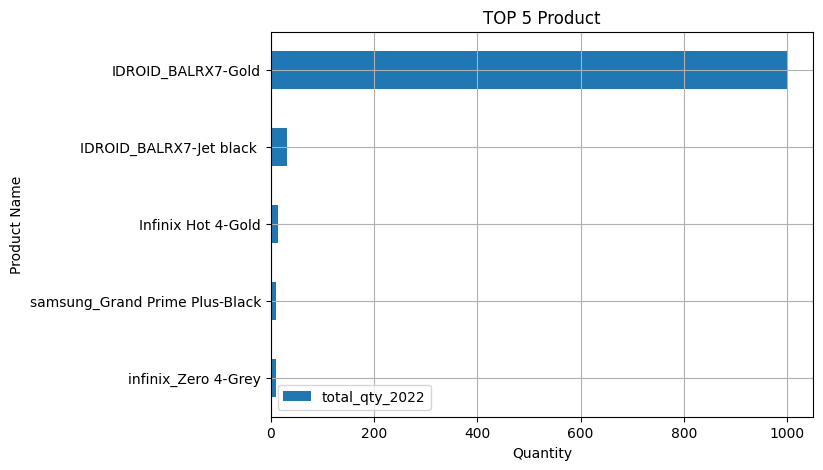

In [ ]:
df_no1.sort_values(by=['total_qty_2022'], ascending=True, inplace=True)

df_no1.plot(x='sku_name',
            y=['total_qty_2022'],
            kind='barh',
            grid=True,
            xlabel='Quantity',
            ylabel='Product Name',
            figsize=(7,5),
            rot=0,
            title='TOP 5 Product',
            table = False,
            sort_columns =  False,
            secondary_y= False)

## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Jawaban No 2.1`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode

        # Memfilter Is_valid =1
df_qty21 = df[(df['is_valid']==1) &\
        # Memfilter tahun = 2021
        (df['year']==2021)]\
        # Mengroupby berdasarkan kolom category
        .groupby(by=["category"])["qty_ordered"]\
        # Melakukan fungsi Agregat sum
        .sum()\
        # Mereset nama header
        .reset_index(name='total_qty_2021')\
        # Mengurutkan berdasarkan kolom Total_qty_2021
        .sort_values(by = 'total_qty_2021' ,ascending=False)
df_qty21
df_qty22 = df[(df['is_valid']==1) &\
        # Memfilter tahun = 2022
        (df['year']==2022)]\
        .groupby(by=["category"])["qty_ordered"]\
        .sum()\
        .reset_index(name='total_qty_2022')\
        .sort_values(by = 'total_qty_2022' ,ascending=False)
df_qty22
# Melakukan fungsi merge untuk kedua data penjualan
df_no2 = df_qty21.merge(df_qty22, left_on = 'category', right_on = 'category')
# Growth = penjualan di tahun terakhir - penjualan di tahun sebelumnya
df_no2['qty_growth']=df_no2['total_qty_2022']-df_no2['total_qty_2021']
df_no2.sort_values(by = ['qty_growth'],ascending=True,inplace=True)
df_no2

IndentationError: ignored

,category,total_qty_2022
9,Mobiles & Tablets,1154
12,Soghaat,612
13,Superstore,536
14,Women Fashion,489
10,Others,263
6,Home & Living,250
11,School & Education,237
7,Kids & Baby,227
5,Health & Sports,200
2,Books,195


In [ ]:
# Melakukan fungsi merge untuk kedua data penjualan
df_no2 = df_qty21.merge(df_qty22, left_on = 'category', right_on = 'category')
# Growth = penjualan di tahun terakhir - penjualan di tahun sebelumnya
df_no2['qty_growth']=df_no2['total_qty_2022']-df_no2['total_qty_2021']
df_no2.sort_values(by = ['qty_growth'],ascending=True,inplace=True)
df_no2


,category,total_qty_2021,total_qty_2022,qty_growth
1,Others,426,263,-163
0,Soghaat,759,612,-147
3,Men Fashion,237,175,-62
9,Beauty & Grooming,168,153,-15
7,Books,171,195,24
11,Appliances,124,148,24
6,Health & Sports,173,200,27
12,Computing,109,153,44
5,School & Education,184,237,53
4,Home & Living,193,250,57


## `Jawaban No 2.2`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode


others_21 = df[(df['is_valid']==1) &\
        # Memfilter tahun = 2021
        (df['year']==2021)&\
        (df['category']=='Others')]\
        .groupby(by=["sku_name"])["qty_ordered"]\
        .sum()\
        .reset_index(name='others_2021')\
        .sort_values(by = 'others_2021' ,ascending=False)
others_21
others_22 = df[(df['is_valid']==1) &\
        # Memfilter tahun = 2022
        (df['year']==2022)&\
        (df['category']=='Others')]\
        .groupby(by=["sku_name"])["qty_ordered"]\
        .sum()\
        .reset_index(name='others_2022')\
        .sort_values(by = 'others_2022' ,ascending=False)
others_22
# menggabungkan data
df_no22 = others_21.merge(others_22, left_on='sku_name', right_on='sku_name')
df_no22['Other_qty_growth']=df_no22['others_2022']-df_no22['others_2021']
df_no22.sort_values(by=['Other_qty_growth'], ascending=True, inplace=True)
df_no22 = df_no22.head(20)
df_no22

,sku_name,others_2021,others_2022,Other_qty_growth
0,RB_Dettol Germ Busting Kit-bf,200,45,-155
1,Telemall_MM-DR-HB-L,23,2,-21
2,kansai_NeverWet,10,1,-9
3,emart_00-1,7,1,-6
5,MEGUIAR_G12711,4,1,-3
10,aw_Ultra Shine Wash & Wax-64oz./1893ml,2,1,-1
8,Entertainer Asia_Vouch 365-2017 Mobile App Lahore,2,1,-1
9,Tmall_MM-DR-PAD,2,1,-1
6,Aladdin_bike_cover,3,2,-1
12,electro_Humidifier,1,1,0


,sku_name,others_qty_2022
37,RB_Dettol Germ Busting Kit-bf,45
82,emart_Tyre Shape Air Compressor,34
43,SKMT_Medicine,20
90,shoppers stop_MagicGlass-3,13
47,TCF_Educate-a-Child-for-a-Month,8
...,...,...
58,Z&A_ZEES-0122,1
14,Kansai_High Heat Auto _ Aluminium,1
60,audionic_Shock-2,1
13,Kansai_Auto_Camouflag_Olive,1


,sku_name,others_qty_2021,others_qty_2022,Other_qty_growth
4,emart_Tyre Shape Air Compressor,5,34,-29
13,emart_0-37,1,7,-6
7,kansai_Undercoating Aerosol,3,6,-3
18,vitamin_265,1,2,-1
14,Entertainer Asia_Vouch 365 - 2017 Book Karachi,1,2,-1
11,aw_CONSTRUCTION FOAM-700ml,1,2,-1
17,MEGUIAR_G18211,1,2,-1
16,MEGUIAR_A1214,1,1,0
15,Lacie_9000146,1,1,0
12,electro_Humidifier,1,1,0


## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

## `Jawaban No 3`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode

        # Memfilter data Is_gross=1
df_filter = df[(df['is_gross']==1) &\
        # Memfilter data Is_valid=0
            (df['is_valid']==0) &\
        # Memfilter data Is_net=0
            (df['is_net']==0) &\
        # Memfilter data year = 2022
            (df['year']==2022)]

df_no3 = df_filter[['customer_id','registered_date']]
df_no3

,customer_id,registered_date
9,C246762L,2022-05-08
18,C848774L,2021-11-07
19,C693415L,2022-04-12
21,C180595L,2022-04-22
22,C587425L,2022-03-22
...,...,...
5856,C394076L,2021-10-12
5859,C248585L,2022-07-10
5865,C471304L,2022-05-13
5881,C265450L,2022-02-17


In [ ]:
#Jalankan kode ini untuk mendownload file
from google.colab import files
df_no3.to_csv('audience_list.csv', encoding ='utf-8-sig',index=False) #ganti [nama variabel file] dengan nama variabel yang digunakan
files.download('audience_list.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

In [ ]:
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_method,sku_name,base_price,cogs,category,registered_date,month,year,day,month_num
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,...,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,November,2021,Friday,11
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,...,jazzwallet,PS4_Slim-500GB,1971942,1321182,Entertainment,2021-11-20,November,2021,Friday,11
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,...,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,2021-11-19,November,2021,Thursday,11
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,...,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,November,2021,Monday,11
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,...,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,November,2021,Sunday,11


In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode

# Menambahkan Kolom Baru
df['day']=df['order_date'].dt.day_name()
df['month_num']=df['order_date'].dt.month
df.head()

df_weekend = pd.DataFrame(df[\
            # Memfilter data is_valid =1
             (df['is_valid']==1) &\
            # Memfilter data tahun =2022
             (df['year']==2022) &\
            # Melakukan fungsi isin pada kolom day "saturday dan sunday"
             (df['day'].isin(['Saturday','Sunday'])) ]\
            # Melakukan Group By dan fungsi agregat mean
             .groupby(by = ["month",'month_num'])["before_discount"].mean()\
            # Melakukan Reset pada Header
             .reset_index(name='profit_avg_weekend').round()\
            # Mengurutkan data berdasarkan kolom profit_avg_weekend
             .sort_values(by = 'profit_avg_weekend' ,ascending=False))
df_weekend
df_weekdays = pd.DataFrame(df[(df['is_valid']==1) &\
             (df['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thusday', 'Friday'])) &\
             (df['year']==2022)]\
             .groupby(by = ['month','month_num'])['before_discount'].mean()\
             .reset_index(name='profit_avg_weekdays')\
             .round()\
             .sort_values(by = 'profit_avg_weekdays' ,ascending=False))
df_weekdays
# Melakukan merge terhadap dua kolom
df_no41 = df_weekend.merge(df_weekdays, left_on='month', right_on='month')
df_no41.sort_values(by = ['month_num_x'],ascending=True,inplace=True)
df_no41 = df_no41[['month','profit_avg_weekend', 'profit_avg_weekdays']]
df_no41



,month,profit_avg_weekend,profit_avg_weekdays
7,January,726764.0,842942.0
3,February,813563.0,654392.0
1,March,909242.0,939440.0
6,April,728545.0,1418578.0
4,May,811327.0,847071.0
11,June,307536.0,552255.0
0,July,1233937.0,937402.0
2,August,850102.0,859519.0
5,September,791584.0,13876775.0
8,October,634260.0,980851.0


In [ ]:
df_weekend = pd.DataFrame(df[\
            # Memfilter data is_valid =1
             (df['is_valid']==1) &\
            # Memfilter data tahun =2022
             (df['year']==2022) &\
             (df['month'].isin(['October','November','December']))&\
            # Melakukan fungsi isin pada kolom day "saturday dan sunday"
             (df['day'].isin(['Saturday','Sunday'])) ]\
            # Melakukan Group By dan fungsi agregat mean
             .groupby(by = ["month",'month_num'])["before_discount"].mean()\
            # Melakukan Reset pada Header
             .reset_index(name='profit_avg_weekend').round()\
            # Mengurutkan data berdasarkan kolom profit_avg_weekend
             .sort_values(by = 'profit_avg_weekend' ,ascending=False))
df_weekend
df_weekdays = pd.DataFrame(df[(df['is_valid']==1) &\
             (df['month'].isin(['October','November','December']))&\
             (df['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thusday', 'Friday'])) &\
             (df['year']==2022)]\
             .groupby(by = ['month','month_num'])['before_discount'].mean()\
             .reset_index(name='profit_avg_weekdays')\
             .round()\
             .sort_values(by = 'profit_avg_weekdays' ,ascending=False))
df_weekdays
# Melakukan merge terhadap dua kolom
df_no41 = df_weekend.merge(df_weekdays, left_on='month', right_on='month')
df_no41.sort_values(by = ['month_num_x'],ascending=True,inplace=True)
df_no41 = df_no41[['month','profit_avg_weekend', 'profit_avg_weekdays']]
df_no41

,month,profit_avg_weekend,profit_avg_weekdays
0,October,634260.0,980851.0
1,November,607794.0,715893.0
2,December,410599.0,587475.0


from matplotlib import pyplot as plt
df_no41['profit_avg_weekend'].plot(kind='hist', bins=20, title='profit_avg_weekend')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_no41['profit_avg_weekdays'].plot(kind='hist', bins=20, title='profit_avg_weekdays')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_no41.groupby('month').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_no41.plot(kind='scatter', x='profit_avg_weekend', y='profit_avg_weekdays', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_no41['profit_avg_weekend'].plot(kind='line', figsize=(8, 4), title='profit_avg_weekend')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_no41['profit_avg_weekdays'].plot(kind='line', figsize=(8, 4), title='profit_avg_weekdays')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_no41['month'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_no41, x='profit_avg_weekend', y='month', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_no41['month'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_no41, x='profit_avg_weekdays', y='month', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: title={'center': 'Rerata Penjualan 2022'}, xlabel='Bulan', ylabel='Profit AVG'>

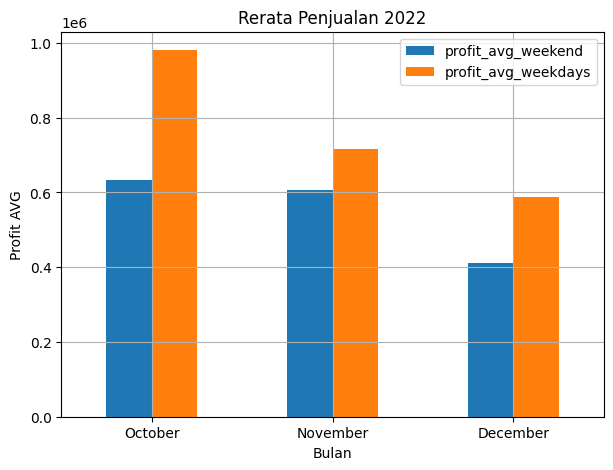

In [ ]:
# plot
#df_no41.sort_values(by = ['month'],ascending=True,inplace=True)

df_no41.plot(x='month',
            y=['profit_avg_weekend','profit_avg_weekdays'],
            kind='bar',
            grid=True,
            xlabel='Bulan',
            ylabel='Profit AVG',
            figsize=(7,5),
            rot=0,
            title='Rerata Penjualan 2022',
            table = False,
            secondary_y= False)

## `Jawaban No 4.2`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode

data_weekend = df[(df['is_valid']==1) &\
             (df['day'].isin(['Saturday','Sunday']))&\
              ((df['order_date'] >= '2022-10-01') & (df['order_date'] <= '2022-12-31'))]

data_weekdays = df[(df['is_valid']==1) &\
                (df['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thusday', 'Friday']))&\
                ((df['order_date'] >= '2022-10-01') & (df['order_date'] <= '2022-12-31'))]

df_no42 = {'periode':'Total 3 Month',\
          'Weekend Avg Sales':round(data_weekend['before_discount'].mean(),2),\
          'Weekdays Avg Sales':round(data_weekdays['before_discount'].mean(),2),\
          'Diff value':round(data_weekend['before_discount'].mean()-data_weekdays['before_discount'].mean(),2),\
          'Diff (%)':pd.Series(round(((data_weekend['before_discount'].mean()-data_weekdays['before_discount'].mean())/data_weekend['before_discount'].mean())*100,2),\
          dtype=str)+'%'
          }
pd.DataFrame(data=df_no42, index=[0])


,periode,Weekend Avg Sales,Weekdays Avg Sales,Diff value,Diff (%)
0,Total 3 Month,558865.15,751972.85,-193107.7,-34.55%
